In [1]:
import ultralytics 
ultralytics.checks()

Ultralytics 8.3.29 🚀 Python-3.10.14 torch-2.4.1 CPU (Apple M3 Max)
Setup complete ✅ (16 CPUs, 48.0 GB RAM, 1042.8/1858.2 GB disk)


In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'

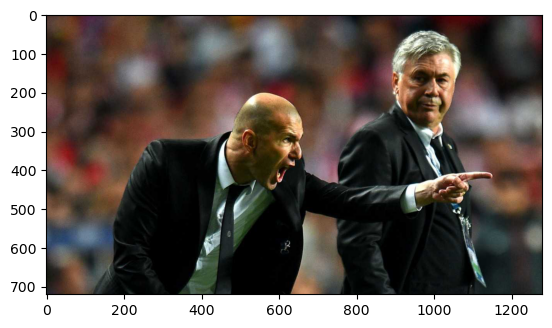

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./zidane.jpg')
plt.imshow(img);

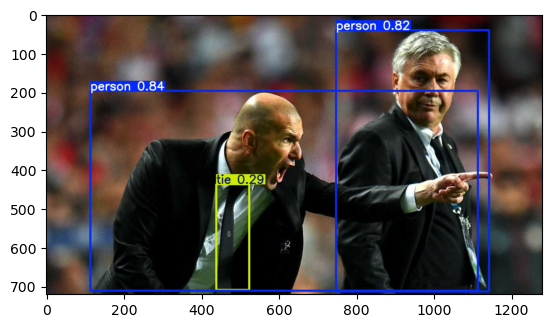

In [3]:
predicted_img = Image.open('./runs/detect/predict/zidane.jpg')
plt.imshow(predicted_img);

In [4]:
from IPython.display import Image, clear_output, display
import cv2, time

def display_image(frame, interval=0.03):
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=500))
    time.sleep(interval)

In [13]:
camera_index = 0
def init_cam(camera_index=camera_index):
    cap = cv2.VideoCapture(camera_index)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
    cap.set(cv2.CAP_PROP_FPS, 10)

    return cap

In [14]:
def run_camera(duration=5, camera_index=0):
    cap = init_cam(camera_index=camera_index)

    start = time.time()
    while time.time() - start < duration:
        ret, frame = cap.read()
        display_image(frame)

    cap.release()

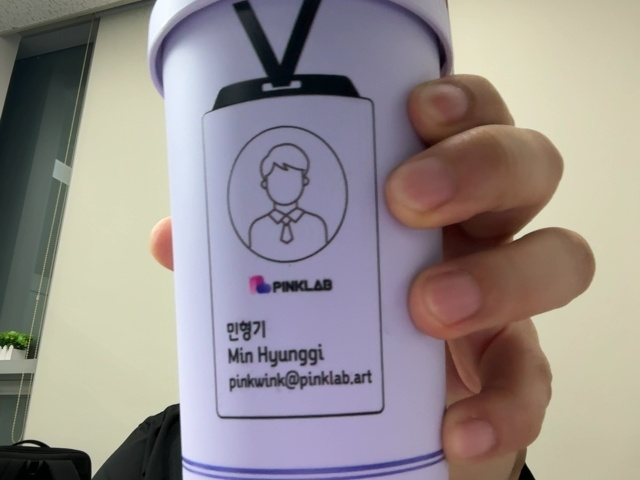

In [7]:
run_camera()

In [18]:
from ultralytics import YOLO

def run_yolo_cam(duration=5, model_path='yolov8n.pt'):
    cap = init_cam()
    model = YOLO(model_path)
    start = time.time()

    while time.time() - start < duration:
        ret, frame = cap.read()
        results = model(frame)        # results는 리스트, results[0]이 첫 번째 프레임 결과
        annotated = results[0].plot() # plot()이 그려진 이미지를 numpy array로 반환
        display_image(annotated)

    cap.release()

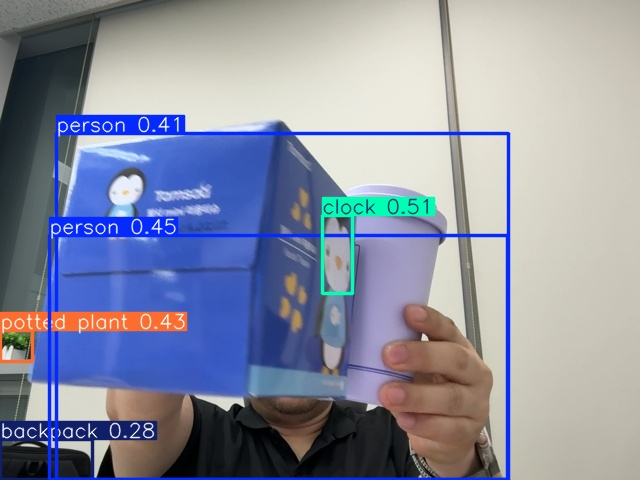

In [20]:
run_yolo_cam()

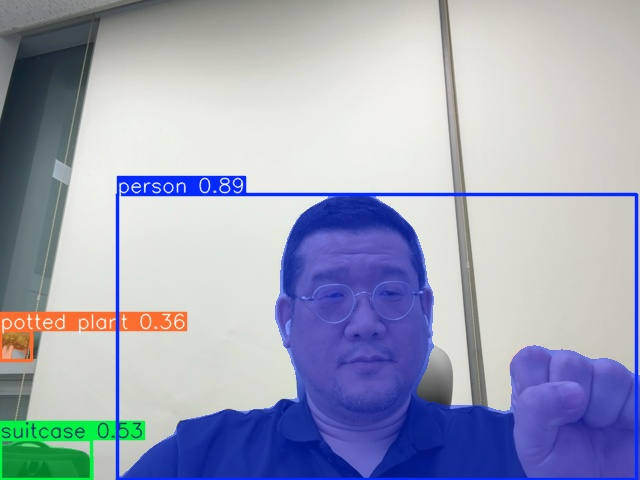

In [21]:
run_yolo_cam(duration=10, model_path='yolov8n-seg.pt')

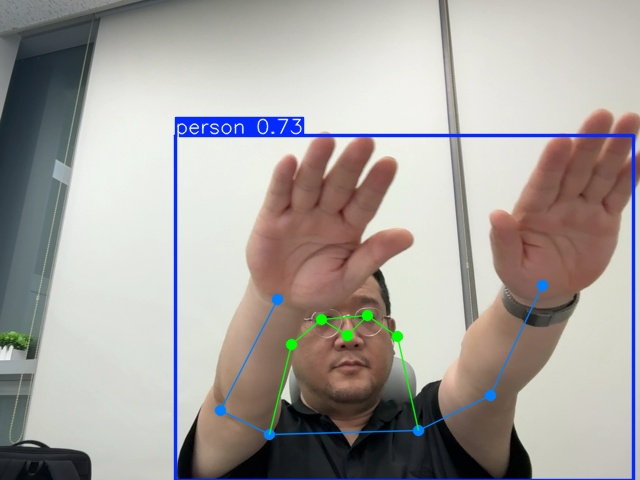

In [22]:
run_yolo_cam(duration=5, model_path='yolov8n-pose.pt')